In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset

df = pd.read_csv(r"C:\Users\vach\Desktop/Project/House rent prediction/hyderabad_housing.csv")

In [3]:
# Extracting information out of amenities column as it is one of the important factors in deciding price values followed by getting rid of unwanted columns
amenities_columns = ['LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA',
                     'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP',
                     'HK', 'PB', 'VP']

for column in amenities_columns:
    df[column] = df['amenities'].str.extract(f"({column}:(True|False))", expand=True)[1].astype(bool).astype('int64')

df1 = df.drop(['amenities','balconies','active','combineDescription','completeStreetName','facing','id','gym','lift','localityId','location','ownerName','parkingDesc','propertyTitle','reactivationSource','shortUrl','type_bhk','weight'], axis=1)
df1 = df1.replace('None', pd.NA).dropna()   

In [4]:
#Making sure that the data types of respective columns are suitable for EDA
df1['maintenanceAmount'] = df1['maintenanceAmount'].astype('int64')
df1['swimmingPool'] = df1['swimmingPool'].astype('int64')

In [5]:
# Since total rent is a sum of the maintenance and usual rent amount, they have been collectively taken as one entity
df1['totalprice'] = df1[['maintenanceAmount', 'rent_amount']].apply(lambda x: x[x.notnull()].sum(), axis=1)
df2 = df1.drop(['maintenanceAmount','deposit','isMaintenance','loanAvailable','rent_amount','propertyType','floor','sharedAccomodation','FS','PARK','POOL','SC','CPA','GP','RWH','STP','HK','PB','VP'],axis=1)
df2

,bathroom,facingDesc,furnishingDesc,locality,parking,property_age,property_size,swimmingPool,totalFloor,waterSupply,LIFT,GYM,INTERNET,AC,CLUB,INTERCOM,SERVANT,SECURITY,totalprice
0,3,West,Semi,Gachibowli,BOTH,5,2200,0,5,CORP_BORE,1,1,1,1,1,1,1,1,30000
2,3,East,Semi,Manikonda,BOTH,0,1800,0,3,CORP_BORE,1,1,1,1,1,1,1,1,17000
3,2,West,Unfurnished,LB Nagar,BOTH,0,750,0,2,CORP_BORE,1,1,1,1,1,1,1,1,9500
4,2,East,Semi,HITEC City,BOTH,5,1250,0,5,CORP_BORE,1,1,1,1,1,1,1,1,34500
5,3,North,Semi,Kondapur,BOTH,1,1517,1,6,CORP_BORE,1,1,1,1,1,1,1,1,35700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19061,2,East,Semi,KPHB Phase 2,FOUR_WHEELER,10,1300,0,5,CORP_BORE,1,1,1,1,1,1,1,1,16000
19072,2,East,Semi,Kukatpally,BOTH,0,1200,0,4,BOREWELL,1,1,1,1,1,1,1,1,14000
19093,1,East,Semi,"No 5 Road, Kukatpally",BOTH,5,650,0,2,CORP_BORE,1,1,1,1,1,1,1,1,9200
19100,2,West,Full,Nizampet Village,BOTH,5,1380,0,3,CORP_BORE,1,1,1,1,1,1,1,1,25300


In [6]:
#Cleaning the locality column of delimiters (Precise data can help training the models better) and selecting more common localities**(it can be improved in future versions of the notebook)
df['locality'] = df['locality'].str.replace(',', '')
locality_counts = df2['locality'].value_counts()
df3 = df2[df2['locality'].isin(locality_counts[locality_counts > 10].index)]

In [7]:
#Renaming the columns for the sake of clarity
df4 = df3.rename(columns = {'furnishingDesc' : 'furnishing', 'LIFT' : 'lift', 'GYM' : 'gym','INTERNET' : 'internet', 'CLUB' : 'club', 'SERVANT' : 'servant', 'SECURITY' : 'security'})
df4

,bathroom,facingDesc,furnishing,locality,parking,property_age,property_size,swimmingPool,totalFloor,waterSupply,lift,gym,internet,AC,club,INTERCOM,servant,security,totalprice
0,3,West,Semi,Gachibowli,BOTH,5,2200,0,5,CORP_BORE,1,1,1,1,1,1,1,1,30000
2,3,East,Semi,Manikonda,BOTH,0,1800,0,3,CORP_BORE,1,1,1,1,1,1,1,1,17000
3,2,West,Unfurnished,LB Nagar,BOTH,0,750,0,2,CORP_BORE,1,1,1,1,1,1,1,1,9500
5,3,North,Semi,Kondapur,BOTH,1,1517,1,6,CORP_BORE,1,1,1,1,1,1,1,1,35700
6,2,East,Semi,Gachibowli,BOTH,5,1198,1,24,CORP_BORE,1,1,1,1,1,1,1,1,33800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19001,2,East,Semi,Kukatpally,BOTH,5,1100,0,5,CORP_BORE,1,1,1,1,1,1,1,1,15000
19006,3,East,Semi,Kokapet,BOTH,0,1735,1,8,CORP_BORE,1,1,1,1,1,1,1,1,34500
19007,2,North,Semi,Attapur,TWO_WHEELER,5,1800,0,3,CORP_BORE,1,1,1,1,1,1,1,1,19000
19010,3,West,Semi,Kukatpally,BOTH,0,1782,1,27,CORPORATION,1,1,1,1,1,1,1,1,46200


In [8]:
#One-Hot Encoding categorical columns to prepare the Data for training the model
df5 = df4[(df4['bathroom'] < 5)]
categorical_columns = ['facingDesc', 'furnishing', 'locality', 'parking', 'waterSupply']
df_dummies = pd.get_dummies(df5[categorical_columns])
df6 = pd.concat([df5.drop(columns=categorical_columns), df_dummies], axis=1)
df6['amenities'] = df6[['swimmingPool', 'lift', 'gym', 'internet', 'AC', 'club', 'INTERCOM', 'servant', 'security']].sum(axis=1)
df6 = df6.drop(['swimmingPool', 'lift', 'gym', 'internet', 'AC', 'club', 'INTERCOM', 'servant', 'security'], axis=1)
df6

,bathroom,property_age,property_size,totalFloor,totalprice,facingDesc_Don't Know,facingDesc_East,facingDesc_North,facingDesc_North-East,facingDesc_North-West,...,locality_Whitefields,locality_Yousufguda,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,waterSupply_BOREWELL,waterSupply_CORPORATION,waterSupply_CORP_BORE,amenities
0,3,5,2200,5,30000,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,8
2,3,0,1800,3,17000,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,8
3,2,0,750,2,9500,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,8
5,3,1,1517,6,35700,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,9
6,2,5,1198,24,33800,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19001,2,5,1100,5,15000,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,8
19006,3,0,1735,8,34500,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,9
19007,2,5,1800,3,19000,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,8
19010,3,0,1782,27,46200,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,9


In [9]:
#x = Data y = Target
x = df6.drop('totalprice', axis = 1)
y = df6.totalprice

In [10]:
#Splitting the dataset for testing the model's accuracy
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [11]:
#Testing multiple Machine Learning models such as Linear Regression, L2 and L1 Regularization, SVM Regression, Decision Tree Regression, Random Forest Regression, Gradient Boosting Regrssion, XGBoost Regression and Neural Network model (Multi-Layer Perceptron)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lr.score(x_test,y_test)

from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.5)  
ridge_model.fit(x_train,y_train)
ridge_model.score(x_train,y_train)
ridge_model.score(x_test,y_test)

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.5)  
lasso_model.fit(x_train,y_train)
lasso_model.score(x_train,y_train)
lasso_model.score(x_test,y_test)

from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(x_train, y_train)
svr_model.score(x_train,y_train)
svr_model.score(x_test,y_test)

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(x_train, y_train)
dt_model.score(x_train,y_train)
dt_model.score(x_test,y_test)

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth = 200, random_state=42)
rf_model.fit(x_train, y_train)
rf_model.score(x_train,y_train)
rf_model.score(x_test,y_test)

from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)
gb_model.score(x_train,y_train)
gb_model.score(x_test,y_test)

from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes=(512,256,128), batch_size = 50, activation='relu', solver='adam', learning_rate = 'adaptive', random_state=42)
nn_model.fit(x_train, y_train)
nn_model.score(x_train,y_train)
nn_model.score(x_test,y_test)

import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_train,y_train)
xgb_model.score(x_test,y_test)

0.773495669553723

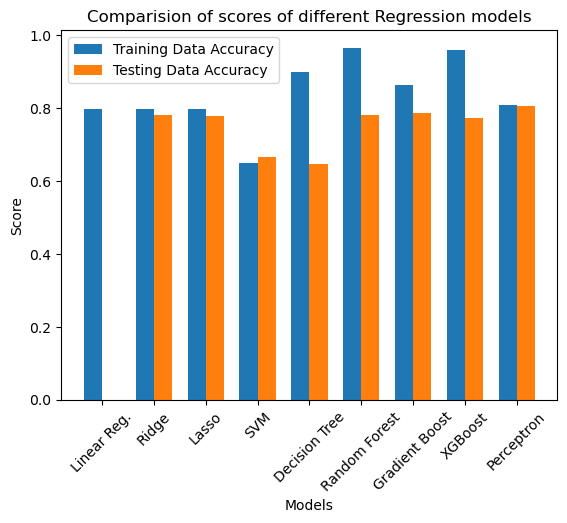

In [12]:
#Comparing the model's training and testing data score (Accuracy)
model_names = ['Linear Reg.', 'Ridge', 'Lasso', 'SVM','Decision Tree','Random Forest','Gradient Boost','XGBoost','Perceptron']
train_scores = [lr.score(x_train,y_train), ridge_model.score(x_train,y_train), lasso_model.score(x_train,y_train),svr_model.score(x_train,y_train),dt_model.score(x_train,y_train),rf_model.score(x_train,y_train),gb_model.score(x_train,y_train),xgb_model.score(x_train,y_train),nn_model.score(x_train,y_train)]
test_scores = [0, ridge_model.score(x_test,y_test), lasso_model.score(x_test,y_test),svr_model.score(x_test,y_test),dt_model.score(x_test,y_test),rf_model.score(x_test,y_test),gb_model.score(x_test,y_test),xgb_model.score(x_test,y_test),nn_model.score(x_test,y_test)]
# Width of each bar
bar_width = 0.35

length = np.arange(len(model_names))
plt.bar(length, train_scores, width=bar_width, label='Training Data Accuracy')
plt.bar(length + bar_width, test_scores, width=bar_width, label='Testing Data Accuracy')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparision of scores of different Regression models')
plt.xticks(length + bar_width / 2, model_names)
plt.legend()
plt.xticks(rotation=45)
# Display the plot
plt.show()

In [13]:
#Function for outputing the features of the required property
def price_prediction(bhk, property_age, property_size, totalfloors, facing, furnishing, locality, park, waterSupply, number_of_amenities):
    X = np.zeros(len(x.columns))
    X[0] = bhk
    X[1] = property_age
    X[2] = property_size
    X[3] = totalfloors
    X[97] = number_of_amenities
    
    columns = ['locality', 'facing', 'furnishing', 'parking', 'waterSupply']
    values = [locality, facing, furnishing, park, waterSupply]
    
    for column, value in zip(columns, values):
        if value in x.columns:
            X[x.columns.get_loc(value)] = 1
    
    return X

In [14]:
# prediction
input_data = price_prediction(3, 3, 1000, 10, 'East', 'Semi', 'Madhapur', 'BOTH', 'BOREWELL', 9)
prediction = xgb_model.predict(input_data.reshape((1, -1)))[0]
prediction

35521.977